In [7]:
import numpy as np
from mp_api.client import MPRester
from pymatgen.core.operations import SymmOp
from pymatgen.symmetry.analyzer import SpacegroupAnalyzer
from pymatgen.electronic_structure.plotter import BSPlotter
from pymatgen.phonon.plotter import PhononBSPlotter
from jupyter_jsmol.pymatgen import quick_view
from lmapr1492 import plot_brillouin_zone, get_plot_bs, get_plot_dos, get_plot_bs_and_dos, get_branch_wavevectors
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from pymatgen.analysis.diffraction.xrd import XRDCalculator
import matplotlib.pyplot as plt

In [2]:
mp_key = "YGuF6wLUiS0cPBcPVPZQwERRrYM11mh7"
mp_id = "mp-22003"

In [5]:
with MPRester(mp_key) as m:
    structure = m.get_structure_by_material_id(mp_id)


Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

In [6]:

xrd_calculator = XRDCalculator(wavelength=1.54060)

pattern = xrd_calculator.get_pattern(structure)

print("Trois premiers pics du diffractogramme :")
for i in range(3):
    peak = pattern.x[i]  
    intensity = pattern.y[i]  
    hkl = pattern.hkls[i] 
    d_spacing = pattern.d_hkls[i]  
    
    print(f"Pic {i + 1}:")
    print(f"   Angle 2θ = {peak:.2f}°")
    print(f"   Intensité relative = {intensity:.2f}")
    print(f"   Indices hkl = {hkl}")
    print(f"   Distance interréticulaire d = {d_spacing:.4f} Å")
    print()

Trois premiers pics du diffractogramme :
Pic 1:
   Angle 2θ = 17.43°
   Intensité relative = 1.41
   Indices hkl = [{'hkl': (1, 1, 1), 'multiplicity': 2}]
   Distance interréticulaire d = 5.0847 Å

Pic 2:
   Angle 2θ = 29.31°
   Intensité relative = 8.89
   Indices hkl = [{'hkl': (1, 0, 0), 'multiplicity': 6}]
   Distance interréticulaire d = 3.0452 Å

Pic 3:
   Angle 2θ = 31.05°
   Intensité relative = 100.00
   Indices hkl = [{'hkl': (1, 1, 0), 'multiplicity': 6}]
   Distance interréticulaire d = 2.8780 Å



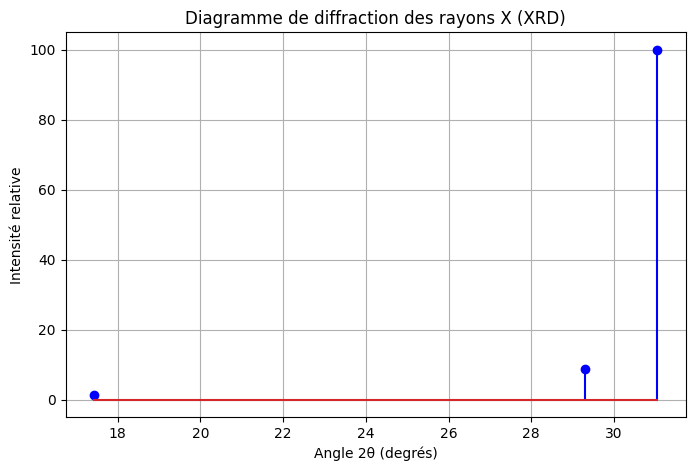

In [12]:
plt.figure(figsize=(8, 5))
plt.stem(pattern.x[:3],pattern.y[:3], linefmt='b-')
plt.title("Diagramme de diffraction des rayons X (XRD)")
plt.xlabel("Angle 2θ (degrés)")
plt.ylabel("Intensité relative")
plt.grid(True)
plt.show()